In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [18]:
df = pd.read_csv('test.csv', na_values='?')
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df.dropna()
## #data preprocessing 
#convert categorical to numerical Gender,Customer Type, Type of Travel,Class

df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

print(df.describe())
df.head(10)

Empty DataFrame
Columns: [id, Age, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction, Gender_Male, Customer Type_disloyal Customer, Type of Travel_Personal Travel, Class_Eco, Class_Eco Plus]
Index: []

[0 rows x 25 columns]
                  id           Age  Flight Distance  Inflight wifi service  \
count   25893.000000  25893.000000     25893.000000           25893.000000   
mean    65021.974858     39.621983      1193.753254               2.723709   
std     37606.098635     15.134224       998.626779               1.334711   
min        17.000000      7.000000        31.000000               0.000000   
25%     32209.000000     27.000000       414.000000               2.000000   
50% 

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,19556,52,160,5,4,3,4,3,4,3,...,5,5,50,44.0,satisfied,False,False,False,True,False
1,90035,36,2863,1,1,3,1,5,4,5,...,4,5,0,0.0,satisfied,False,False,False,False,False
2,12360,20,192,2,0,2,4,2,2,2,...,2,2,0,0.0,neutral or dissatisfied,True,True,False,True,False
3,77959,44,3377,0,0,0,2,3,4,4,...,1,4,0,6.0,satisfied,True,False,False,False,False
4,36875,49,1182,2,3,4,3,4,1,2,...,2,4,0,20.0,satisfied,False,False,False,True,False
5,39177,16,311,3,3,3,3,5,5,3,...,2,5,0,0.0,satisfied,True,False,False,True,False
6,79433,77,3987,5,5,5,5,3,5,5,...,5,3,0,0.0,satisfied,False,False,False,False,False
7,97286,43,2556,2,2,2,2,4,4,5,...,4,3,77,65.0,satisfied,False,False,False,False,False
8,27508,47,556,5,2,2,2,5,5,5,...,3,5,1,0.0,satisfied,True,False,False,True,False
9,62482,46,1744,2,2,2,2,3,4,4,...,4,4,28,14.0,satisfied,False,False,False,False,False


In [19]:
attr = df.drop(columns = ['satisfaction', 'id'])
target = df['satisfaction']
attr.head()
#target.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,2,5,5,50,44.0,False,False,False,True,False
1,36,2863,1,1,3,1,5,4,5,4,...,3,4,5,0,0.0,False,False,False,False,False
2,20,192,2,0,2,4,2,2,2,2,...,2,2,2,0,0.0,True,True,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,3,1,4,0,6.0,True,False,False,False,False
4,49,1182,2,3,4,3,4,1,2,2,...,4,2,4,0,20.0,False,False,False,True,False


In [20]:
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[4045  298]
 [ 257 3168]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.93      0.94      4343
              satisfied       0.91      0.92      0.92      3425

               accuracy                           0.93      7768
              macro avg       0.93      0.93      0.93      7768
           weighted avg       0.93      0.93      0.93      7768



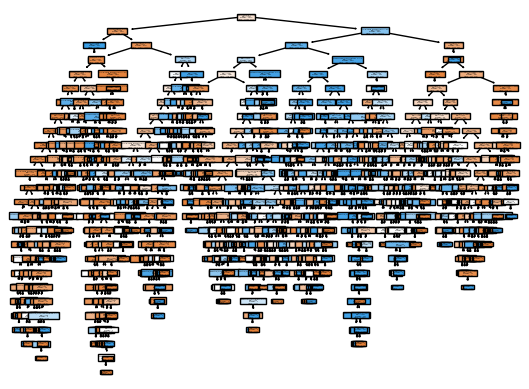

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(model, filled=True,feature_names=attr.columns);